In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
cd C:\\Users\\Josh\\COMPSCI\\COMP309\\Assignment1

C:\Users\Josh\COMPSCI\COMP309\Assignment1


In [4]:
bn = pd.read_csv("banknotes.csv")
ion = pd.read_csv("ionosphere.csv")
steel = pd.read_csv("steel-plates-fault.csv")

X, y = make_classification(n_features=20, n_redundant=0, n_informative=5, n_clusters_per_class=1)
X += 4.0 * np.random.uniform(size=X.shape)
myfakedataset = (X,y)

X = StandardScaler().fit_transform(X)
bn.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [4]:
#banknotes
bnX = bn.iloc[:, :-1].values
bny = bn.iloc[:, 4]
#ionosphere
ionX = ion.iloc[:, :-1].values
iony = ion.iloc[:, 34]
#steel
stX = steel.iloc[:, :-1].values
sty = steel.iloc[:, 33]

#fake data
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
def split(bankX, bankY, ionsphereX, ionsphereY, steelX, steelY, fakeX, fakeY, classify):
    #banknotes
    X1_train, X1_test, y1_train, y1_test = train_test_split(bankX, bankY, test_size=0.5)
    #ionsphere
    X2_train, X2_test, y2_train, y2_test = train_test_split(ionsphereX, ionsphereY, test_size=0.5)
    #steel
    X3_train, X3_test, y3_train, y3_test = train_test_split(steelX, steelY, test_size=0.5)
    #fake
    X4_train, X4_test, y4_train, y4_test = train_test_split(fakeX, fakeY, test_size=0.5)
    
    #banknotes                                                        
    scaler = StandardScaler()
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    #ionsphere
    scaler = StandardScaler()
    scaler.fit(X2_train)
    X2_train = scaler.transform(X2_train)
    X2_test = scaler.transform(X2_test)
    #steel
    scaler = StandardScaler()
    scaler.fit(X3_train)
    X3_train = scaler.transform(X3_train)
    X3_test = scaler.transform(X3_test)

    #banknotes
    classifier = classify
    classifier.fit(X1_train, y1_train)
    y1_pred = classifier.predict(X1_test)
    bankNote_score = accuracy_score(y1_test, y1_pred)
    #ionsphere
    classifier = classify
    classifier.fit(X2_train, y2_train)
    y2_pred = classifier.predict(X2_test)
    ionsphere_score = accuracy_score(y2_test, y2_pred)
    #steelplate
    classifier = classify
    classifier.fit(X3_train, y3_train)
    y3_pred = classifier.predict(X3_test)
    steelPlate_score = accuracy_score(y3_test, y3_pred)
    #fake
    classifier = classify
    classifier.fit(X4_train, y4_train)
    y4_pred = classifier.predict(X4_test)
    fake_score = accuracy_score(y4_test, y4_pred)
    
    return bankNote_score, ionsphere_score, steelPlate_score, fake_score
    

In [6]:
def makeTable(bank, ions, steel, fake, table1, table2, ind, arr):
    #banknotes
    high = 0.0
    index = 0
    for k in arr:
        s = bank[k]
        sum = 0
        for l in s:
            sum += l
        ave = sum/s.size
        if ave > high:
            high = ave
            index = k

    table1[ind,0] = high
    table2[ind,0] = index
    #ionsphere
    high = 0.0
    index = 0
    for k in arr:
        s = ions[k]
        sum = 0
        for l in s:
            sum += l
        ave = sum/s.size
        if ave > high:
            high = ave
            index = k

    table1[ind,1] = high
    table2[ind,1] = index
    #steelplates
    high = 0.0
    index = 0
    for k in arr:
        s = steel[k]
        sum = 0
        for l in s:
            sum += l
        ave = sum/s.size
        if ave > high:
            high = ave
            index = k

    table1[ind,2] = high
    table2[ind,2] = index
    #fake
    high = 0.0
    index = 0
    for k in arr:
        s = fake[k]
        sum = 0
        for l in s:
            sum += l
        ave = sum/s.size
        if ave > high:
            high = ave
            index = k

    table1[ind,3] = high
    table2[ind,3] = index
    
    return table1, table2

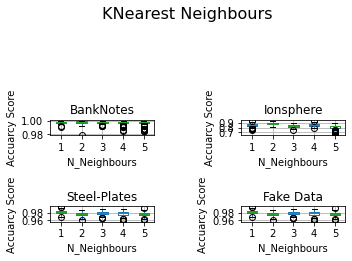

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knBkNotes = np.zeros((250,5))
knIons = np.zeros((250,5))
knSteelPlate = np.zeros((250,5))
knFake = np.zeros((250,5))

for i in range(0,5):
    for j in range(250):
        knBkNotes[j,i], knIons[j,i], knSteelPlate[j,i], knFake[j,i] = split(bnX, bny, ionX, iony, stX, sty, X, y, KNeighborsClassifier(i+1))
       



figure, axs = plt.subplots(2,2)
figure.suptitle("KNearest Neighbours", fontsize=16)
figure.tight_layout(pad=5)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
#banknotes
newBk = pd.DataFrame(knBkNotes, columns=["1", "2", "3", "4", "5"])
bankBoxplot = newBk.boxplot(ax = axs[0,0])
bankBoxplot.set_ylabel('Accuarcy Score')
bankBoxplot.set_xlabel('N_Neighbours')
bankBoxplot.set_title('BankNotes')

#ionsphere
newIon = pd.DataFrame(knIons, columns=["1", "2", "3", "4", "5"])
IonBoxplot = newIon.boxplot(ax = axs[0,1])
IonBoxplot.set_ylabel('Accuarcy Score')
IonBoxplot.set_xlabel('N_Neighbours')
IonBoxplot.set_title('Ionsphere')
#steel-plate
newSteel = pd.DataFrame(knSteelPlate, columns=["1", "2", "3", "4", "5"])
SteBoxplot = newSteel.boxplot(ax = axs[1,0])
SteBoxplot.set_ylabel('Accuarcy Score')
SteBoxplot.set_xlabel('N_Neighbours')
SteBoxplot.set_title('Steel-Plates')
#fake
newFake = pd.DataFrame(knFake, columns=["1", "2", "3", "4", "5"])
FakBoxplot = newSteel.boxplot(ax = axs[1,1])
FakBoxplot.set_ylabel('Accuarcy Score')
FakBoxplot.set_xlabel('N_Neighbours')
FakBoxplot.set_title('Fake Data')

BestAssoTable = np.zeros((7,4))
BestModelTable = np.zeros((7,4))

Karray = ["1", "2", "3", "4", "5"]
BestAssoTable, BestModelTable = makeTable(newBk, newIon, newSteel, newFake, BestAssoTable, BestModelTable, 0, Karray)

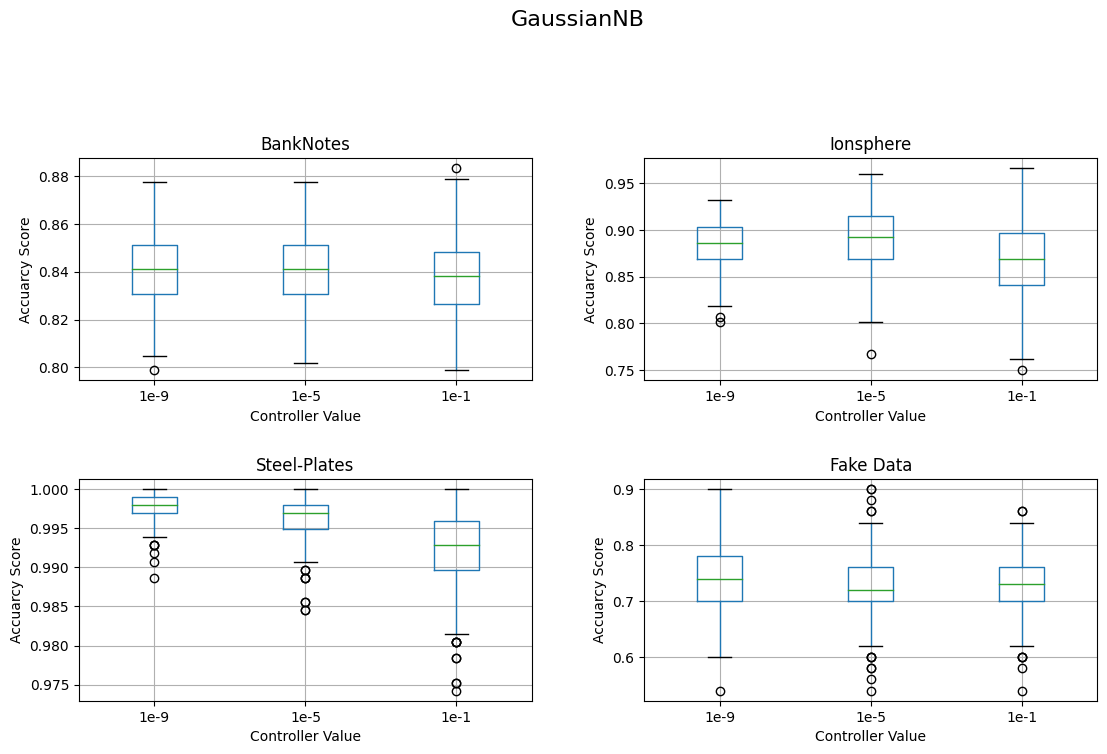

In [8]:
from sklearn.naive_bayes import GaussianNB

GabkNotes = np.zeros((250,3))
Gaions = np.zeros((250,3))
GasteelPlate = np.zeros((250,3))
Gafake = np.zeros((250,3))

for j in range(250):
    GabkNotes[j,0], Gaions[j,0], GasteelPlate[j,0], Gafake[j,0] = split(bnX, bny, ionX, iony, stX, sty, X, y, GaussianNB(var_smoothing=1e-9))

for j in range(250):
    GabkNotes[j,1], Gaions[j,1], GasteelPlate[j,1], Gafake[j,1] = split(bnX, bny, ionX, iony, stX, sty, X, y, GaussianNB(var_smoothing=1e-5))
    
for j in range(250):
    GabkNotes[j,2], Gaions[j,2], GasteelPlate[j,2], Gafake[j,2] = split(bnX, bny, ionX, iony, stX, sty, X, y, GaussianNB(var_smoothing=1e-1))
    
figure, axs = plt.subplots(2,2)
figure.suptitle("GaussianNB", fontsize=16)
figure.tight_layout(pad=5)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
#banknotes
GaBk = pd.DataFrame(GabkNotes, columns=["1e-9", "1e-5", "1e-1"])
GabankBoxplot = GaBk.boxplot(ax = axs[0,0])
GabankBoxplot.set_ylabel('Accuarcy Score')
GabankBoxplot.set_xlabel('Controller Value')
GabankBoxplot.set_title('BankNotes')

#ionsphere
GanewIon = pd.DataFrame(Gaions, columns=["1e-9", "1e-5", "1e-1"])
GaIonBoxplot = GanewIon.boxplot(ax = axs[0,1])
GaIonBoxplot.set_ylabel('Accuarcy Score')
GaIonBoxplot.set_xlabel('Controller Value')
GaIonBoxplot.set_title('Ionsphere')
#steel-plate
GanewSteel = pd.DataFrame(GasteelPlate, columns=["1e-9", "1e-5", "1e-1"])
GaSteBoxplot = GanewSteel.boxplot(ax = axs[1,0])
GaSteBoxplot.set_ylabel('Accuarcy Score')
GaSteBoxplot.set_xlabel('Controller Value')
GaSteBoxplot.set_title('Steel-Plates')
#fake
GanewFake = pd.DataFrame(Gafake, columns=["1e-9", "1e-5", "1e-1"])
GaFakBoxplot = GanewFake.boxplot(ax = axs[1,1])
GaFakBoxplot.set_ylabel('Accuarcy Score')
GaFakBoxplot.set_xlabel('Controller Value')
GaFakBoxplot.set_title('Fake Data')

Gaarray = ["1e-9", "1e-5", "1e-1"]
BestAssoTable, BestModelTable = makeTable(GaBk, GanewIon, GanewSteel, GanewFake, BestAssoTable, BestModelTable, 1, Gaarray)


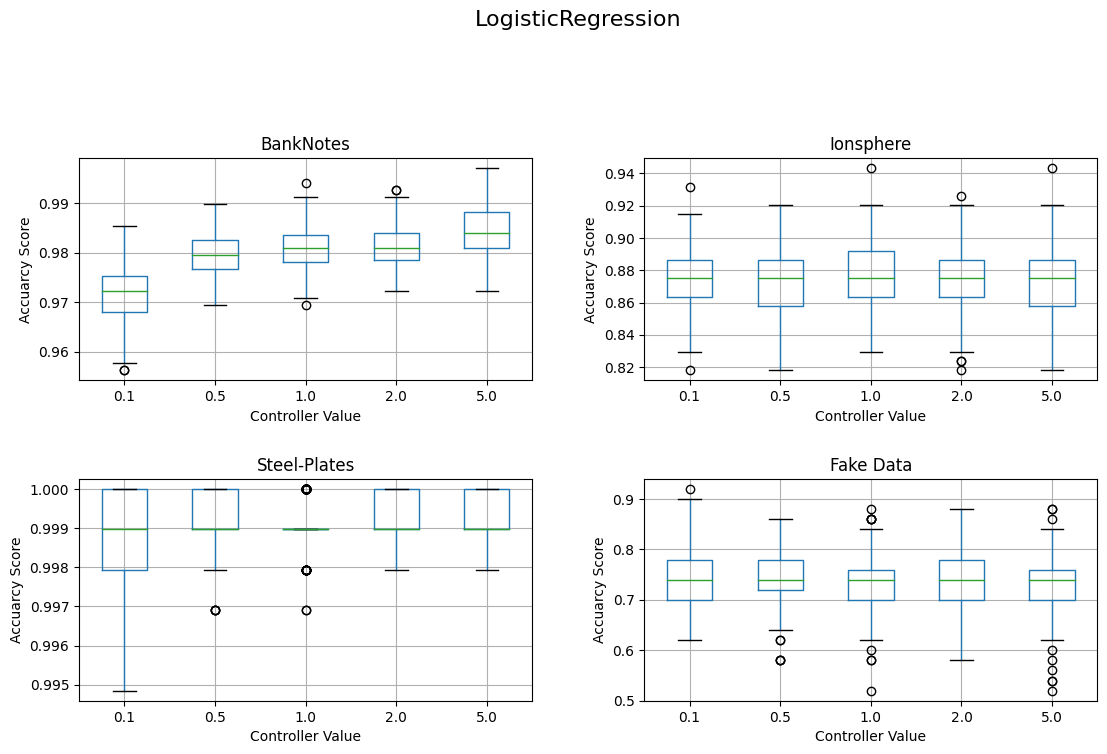

In [9]:
from sklearn.linear_model import LogisticRegression

LgbkNotes = np.zeros((250,5))
Lgions = np.zeros((250,5))
LgsteelPlate = np.zeros((250,5))
Lgfake = np.zeros((250,5))

for j in range(250):
    LgbkNotes[j,0], Lgions[j,0], LgsteelPlate[j,0], Lgfake[j,0] = split(bnX, bny, ionX, iony, stX, sty, X, y, LogisticRegression(C=0.1))

for j in range(250):
    LgbkNotes[j,1], Lgions[j,1], LgsteelPlate[j,1], Lgfake[j,1] = split(bnX, bny, ionX, iony, stX, sty, X, y, LogisticRegression(C=0.5))
    
for j in range(250):
    LgbkNotes[j,2], Lgions[j,2], LgsteelPlate[j,2], Lgfake[j,2] = split(bnX, bny, ionX, iony, stX, sty, X, y, LogisticRegression(C=1.0))

for j in range(250):
    LgbkNotes[j,3], Lgions[j,3], LgsteelPlate[j,3], Lgfake[j,3] = split(bnX, bny, ionX, iony, stX, sty, X, y, LogisticRegression(C=2.0))
    
for j in range(250):
    LgbkNotes[j,4], Lgions[j,4], LgsteelPlate[j,4], Lgfake[j,4] = split(bnX, bny, ionX, iony, stX, sty, X, y, LogisticRegression(C=5.0))
    
figure, axs = plt.subplots(2,2)
figure.suptitle("LogisticRegression", fontsize=16)
figure.tight_layout(pad=5)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
#banknotes
LgBk = pd.DataFrame(LgbkNotes, columns=["0.1","0.5","1.0","2.0", "5.0"])
LgbankBoxplot = LgBk.boxplot(ax = axs[0,0])
LgbankBoxplot.set_ylabel('Accuarcy Score')
LgbankBoxplot.set_xlabel('Controller Value')
LgbankBoxplot.set_title('BankNotes')

#ionsphere
LgnewIon = pd.DataFrame(Lgions, columns=["0.1","0.5","1.0","2.0", "5.0"])
LgIonBoxplot = LgnewIon.boxplot(ax = axs[0,1])
LgIonBoxplot.set_ylabel('Accuarcy Score')
LgIonBoxplot.set_xlabel('Controller Value')
LgIonBoxplot.set_title('Ionsphere')
#steel-plate
LgnewSteel = pd.DataFrame(LgsteelPlate, columns=["0.1","0.5","1.0","2.0", "5.0"])
LgSteBoxplot = LgnewSteel.boxplot(ax = axs[1,0])
LgSteBoxplot.set_ylabel('Accuarcy Score')
LgSteBoxplot.set_xlabel('Controller Value')
LgSteBoxplot.set_title('Steel-Plates')
#fake
LgnewFake = pd.DataFrame(Lgfake, columns=["0.1","0.5","1.0","2.0", "5.0"])
LgFakBoxplot = LgnewFake.boxplot(ax = axs[1,1])
LgFakBoxplot.set_ylabel('Accuarcy Score')
LgFakBoxplot.set_xlabel('Controller Value')
LgFakBoxplot.set_title('Fake Data')

Lgarray = ["0.1","0.5","1.0","2.0", "5.0"]
BestAssoTable, BestModelTable = makeTable(LgBk, LgnewIon, LgnewSteel, LgnewFake, BestAssoTable, BestModelTable, 2, Lgarray)

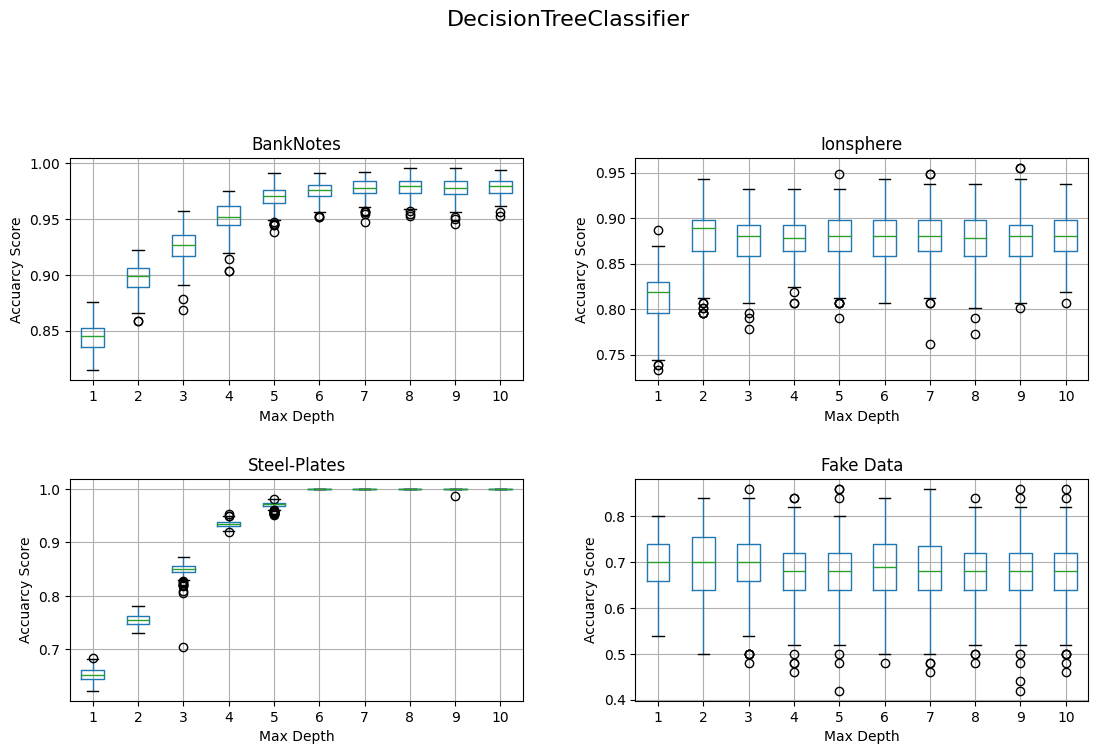

In [10]:
from sklearn.tree import DecisionTreeClassifier

DTBkNotes = np.zeros((250,10))
DTIons = np.zeros((250,10))
DTSteelPlate = np.zeros((250,10))
DTFake = np.zeros((250,10))

for i in range(0,10):
    for j in range(250):
        DTBkNotes[j,i], DTIons[j,i], DTSteelPlate[j,i], DTFake[j,i] = split(bnX, bny, ionX, iony, stX, sty, X, y, DecisionTreeClassifier(max_depth=i+1))

figure, axs = plt.subplots(2,2)
figure.suptitle("DecisionTreeClassifier", fontsize=16)
figure.tight_layout(pad=5)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
#banknotes
DTBk = pd.DataFrame(DTBkNotes, columns=["1","2","3","4", "5", "6", "7", "8", "9", "10"])
DTbankBoxplot = DTBk.boxplot(ax = axs[0,0])
DTbankBoxplot.set_ylabel('Accuarcy Score')
DTbankBoxplot.set_xlabel('Max Depth')
DTbankBoxplot.set_title('BankNotes')

#ionsphere
DTnewIon = pd.DataFrame(DTIons, columns=["1","2","3","4", "5", "6", "7", "8", "9", "10"])
DTIonBoxplot = DTnewIon.boxplot(ax = axs[0,1])
DTIonBoxplot.set_ylabel('Accuarcy Score')
DTIonBoxplot.set_xlabel('Max Depth')
DTIonBoxplot.set_title('Ionsphere')
#steel-plate
DTnewSteel = pd.DataFrame(DTSteelPlate, columns=["1","2","3","4", "5", "6", "7", "8", "9", "10"])
DTSteBoxplot = DTnewSteel.boxplot(ax = axs[1,0])
DTSteBoxplot.set_ylabel('Accuarcy Score')
DTSteBoxplot.set_xlabel('Max Depth')
DTSteBoxplot.set_title('Steel-Plates')
#fake
DTnewFake = pd.DataFrame(DTFake, columns=["1","2","3","4", "5", "6", "7", "8", "9", "10"])
DTFakBoxplot = DTnewFake.boxplot(ax = axs[1,1])
DTFakBoxplot.set_ylabel('Accuarcy Score')
DTFakBoxplot.set_xlabel('Max Depth')
DTFakBoxplot.set_title('Fake Data')

DTarray = ["1","2","3","4", "5", "6", "7", "8", "9", "10"]
BestAssoTable, BestModelTable = makeTable(DTBk, DTnewIon, DTnewSteel, DTnewFake, BestAssoTable, BestModelTable, 3, DTarray)

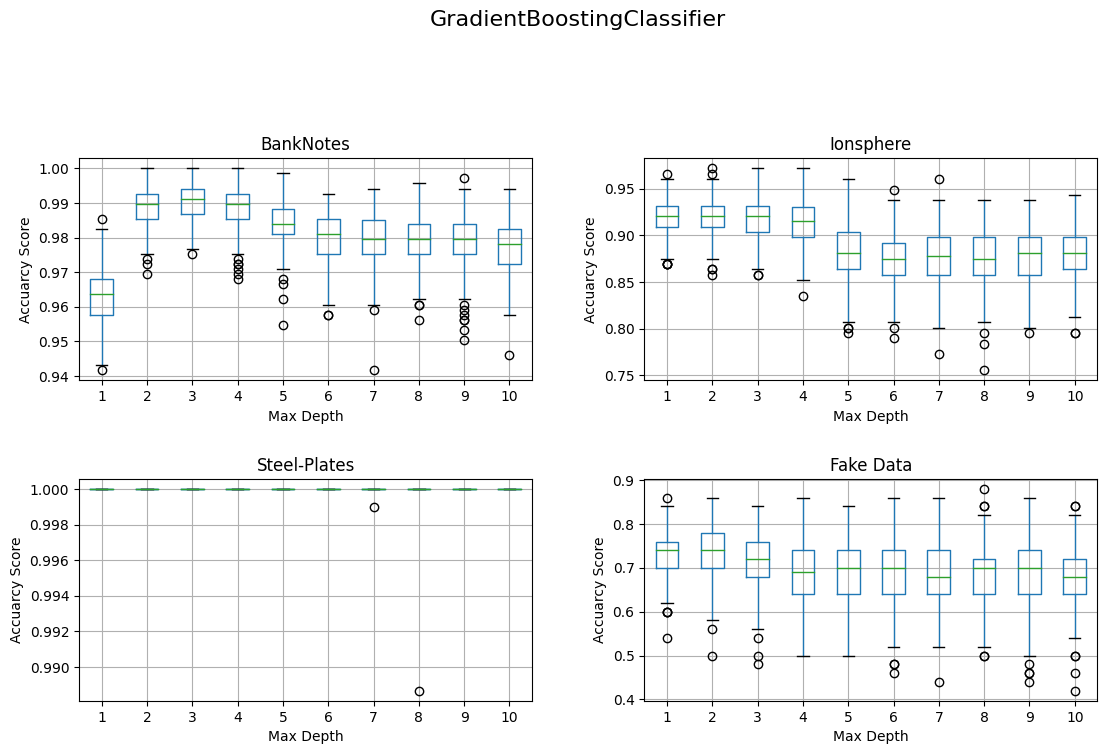

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

GBBkNotes = np.zeros((250,10))
GBIons = np.zeros((250,10))
GBSteelPlate = np.zeros((250,10))
GBFake = np.zeros((250,10))

for i in range(0,10):
    for j in range(250):
        GBBkNotes[j,i], GBIons[j,i], GBSteelPlate[j,i], GBFake[j,i] = split(bnX, bny, ionX, iony, stX, sty, X, y, GradientBoostingClassifier(max_depth=i+1))

figure, axs = plt.subplots(2,2)
figure.suptitle("GradientBoostingClassifier", fontsize=16)
figure.tight_layout(pad=5)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
#banknotes
GBBk = pd.DataFrame(GBBkNotes, columns=["1","2","3","4", "5", "6", "7", "8", "9", "10"])
GBbankBoxplot = GBBk.boxplot(ax = axs[0,0])
GBbankBoxplot.set_ylabel('Accuarcy Score')
GBbankBoxplot.set_xlabel('Max Depth')
GBbankBoxplot.set_title('BankNotes')

#ionsphere
GBnewIon = pd.DataFrame(GBIons, columns=["1","2","3","4", "5", "6", "7", "8", "9", "10"])
GBIonBoxplot = GBnewIon.boxplot(ax = axs[0,1])
GBIonBoxplot.set_ylabel('Accuarcy Score')
GBIonBoxplot.set_xlabel('Max Depth')
GBIonBoxplot.set_title('Ionsphere')
#steel-plate
GBnewSteel = pd.DataFrame(GBSteelPlate, columns=["1","2","3","4", "5", "6", "7", "8", "9", "10"])
GBSteBoxplot = GBnewSteel.boxplot(ax = axs[1,0])
GBSteBoxplot.set_ylabel('Accuarcy Score')
GBSteBoxplot.set_xlabel('Max Depth')
GBSteBoxplot.set_title('Steel-Plates')
#fake
GBnewFake = pd.DataFrame(GBFake, columns=["1","2","3","4", "5", "6", "7", "8", "9", "10"])
GBFakBoxplot = GBnewFake.boxplot(ax = axs[1,1])
GBFakBoxplot.set_ylabel('Accuarcy Score')
GBFakBoxplot.set_xlabel('Max Depth')
GBFakBoxplot.set_title('Fake Data')

GBarray = ["1","2","3","4", "5", "6", "7", "8", "9", "10"]
BestAssoTable, BestModelTable = makeTable(GBBk, GBnewIon, GBnewSteel, GBnewFake, BestAssoTable, BestModelTable, 4, GBarray)

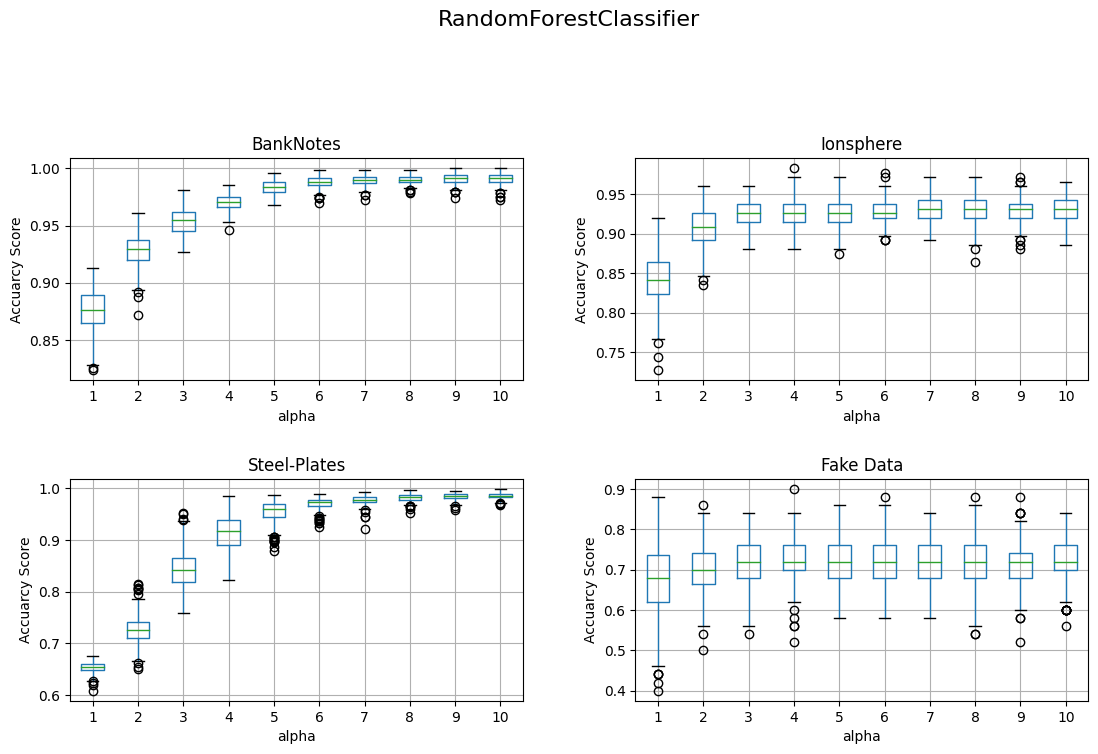

In [12]:
from sklearn.ensemble import RandomForestClassifier

RFBkNotes = np.zeros((250,10))
RFIons = np.zeros((250,10))
RFSteelPlate = np.zeros((250,10))
RFFake = np.zeros((250,10))

for i in range(0,10):
    for j in range(250):
        RFBkNotes[j,i], RFIons[j,i], RFSteelPlate[j,i], RFFake[j,i] = split(bnX, bny, ionX, iony, stX, sty, X, y, RandomForestClassifier(max_depth=i+1))

figure, axs = plt.subplots(2,2)
figure.suptitle("RandomForestClassifier", fontsize=16)
figure.tight_layout(pad=5)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
#banknotes
RFBk = pd.DataFrame(RFBkNotes, columns=["1","2","3","4", "5", "6", "7", "8", "9", "10"])
RFbankBoxplot = RFBk.boxplot(ax = axs[0,0])
RFbankBoxplot.set_ylabel('Accuarcy Score')
RFbankBoxplot.set_xlabel('alpha')
RFbankBoxplot.set_title('BankNotes')

#ionsphere
RFnewIon = pd.DataFrame(RFIons, columns=["1","2","3","4", "5", "6", "7", "8", "9", "10"])
RFIonBoxplot = RFnewIon.boxplot(ax = axs[0,1])
RFIonBoxplot.set_ylabel('Accuarcy Score')
RFIonBoxplot.set_xlabel('alpha')
RFIonBoxplot.set_title('Ionsphere')
#steel-plate
RFnewSteel = pd.DataFrame(RFSteelPlate, columns=["1","2","3","4", "5", "6", "7", "8", "9", "10"])
RFSteBoxplot = RFnewSteel.boxplot(ax = axs[1,0])
RFSteBoxplot.set_ylabel('Accuarcy Score')
RFSteBoxplot.set_xlabel('alpha')
RFSteBoxplot.set_title('Steel-Plates')
#fake
RFnewFake = pd.DataFrame(RFFake, columns=["1","2","3","4", "5", "6", "7", "8", "9", "10"])
RFFakBoxplot = RFnewFake.boxplot(ax = axs[1,1])
RFFakBoxplot.set_ylabel('Accuarcy Score')
RFFakBoxplot.set_xlabel('alpha')
RFFakBoxplot.set_title('Fake Data')

RFarray = ["1","2","3","4", "5", "6", "7", "8", "9", "10"]
BestAssoTable, BestModelTable = makeTable(RFBk, RFnewIon, RFnewSteel, RFnewFake, BestAssoTable, BestModelTable, 5, RFarray)

c:\users\josh\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\josh\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\josh\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\josh\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

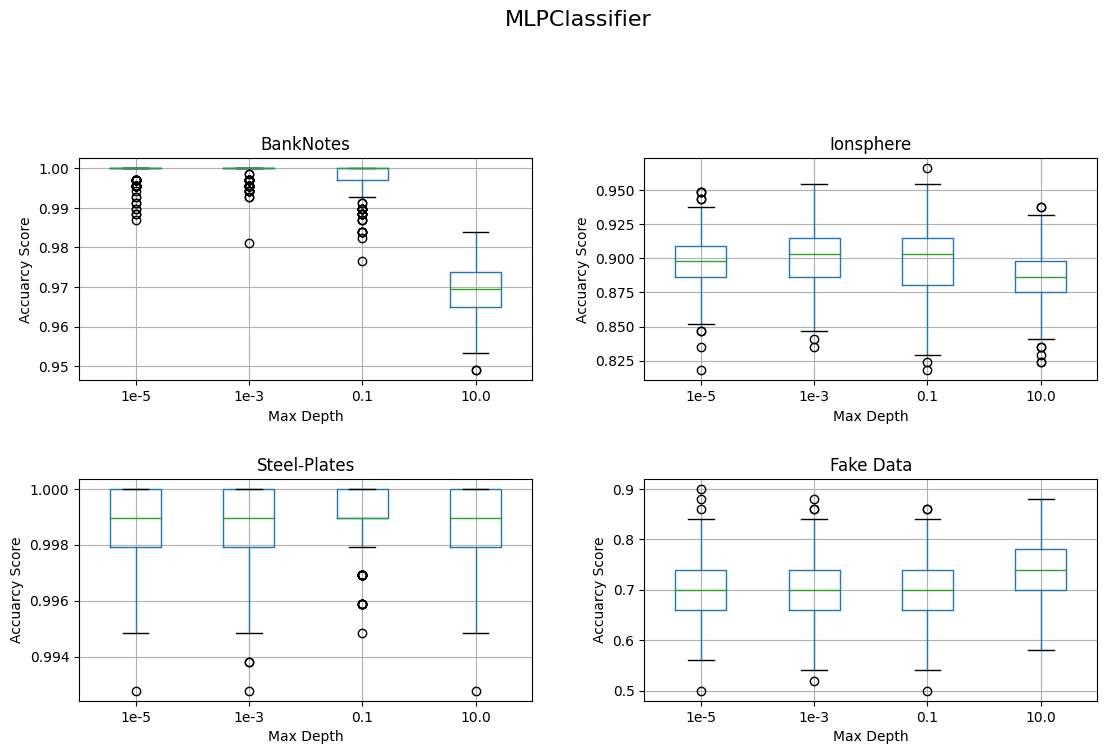

In [13]:
from sklearn.neural_network import MLPClassifier

MLPbkNotes = np.zeros((250,4))
MLPions = np.zeros((250,4))
MLPsteelPlate = np.zeros((250,4))
MLPfake = np.zeros((250,4))

for j in range(250):
    MLPbkNotes[j,0], MLPions[j,0], MLPsteelPlate[j,0], MLPfake[j,0] = split(bnX, bny, ionX, iony, stX, sty, X, y, MLPClassifier(alpha=1e-5))

for j in range(250):
    MLPbkNotes[j,1], MLPions[j,1], MLPsteelPlate[j,1], MLPfake[j,1] = split(bnX, bny, ionX, iony, stX, sty, X, y, MLPClassifier(alpha=1e-3))
    
for j in range(250):
    MLPbkNotes[j,2], MLPions[j,2], MLPsteelPlate[j,2], MLPfake[j,2] = split(bnX, bny, ionX, iony, stX, sty, X, y, MLPClassifier(alpha=0.1))
    
for j in range(250):
    MLPbkNotes[j,3], MLPions[j,3], MLPsteelPlate[j,3], MLPfake[j,3] = split(bnX, bny, ionX, iony, stX, sty, X, y, MLPClassifier(alpha=10.0))
    
figure, axs = plt.subplots(2,2)
figure.suptitle("MLPClassifier", fontsize=16)
figure.tight_layout(pad=5)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
#banknotes
MLPBk = pd.DataFrame(MLPbkNotes, columns=["1e-5", "1e-3", "0.1", "10.0"])
MLPbankBoxplot = MLPBk.boxplot(ax = axs[0,0])
MLPbankBoxplot.set_ylabel('Accuarcy Score')
MLPbankBoxplot.set_xlabel('Max Depth')
MLPbankBoxplot.set_title('BankNotes')

#ionsphere
MLPnewIon = pd.DataFrame(MLPions, columns=["1e-5", "1e-3", "0.1", "10.0"])
MLPIonBoxplot = MLPnewIon.boxplot(ax = axs[0,1])
MLPIonBoxplot.set_ylabel('Accuarcy Score')
MLPIonBoxplot.set_xlabel('Max Depth')
MLPIonBoxplot.set_title('Ionsphere')
#steel-plate
MLPnewSteel = pd.DataFrame(MLPsteelPlate, columns=["1e-5", "1e-3", "0.1", "10.0"])
MLPSteBoxplot = MLPnewSteel.boxplot(ax = axs[1,0])
MLPSteBoxplot.set_ylabel('Accuarcy Score')
MLPSteBoxplot.set_xlabel('Max Depth')
MLPSteBoxplot.set_title('Steel-Plates')
#fake
MLPnewFake = pd.DataFrame(MLPfake, columns=["1e-5", "1e-3", "0.1", "10.0"])
MLPFakBoxplot = MLPnewFake.boxplot(ax = axs[1,1])
MLPFakBoxplot.set_ylabel('Accuarcy Score')
MLPFakBoxplot.set_xlabel('Max Depth')
MLPFakBoxplot.set_title('Fake Data')

MLParray = ["1e-5", "1e-3", "0.1", "10.0"]
BestAssoTable, BestModelTable = makeTable(MLPBk, MLPnewIon, MLPnewSteel, MLPnewFake, BestAssoTable, BestModelTable, 6, MLParray)

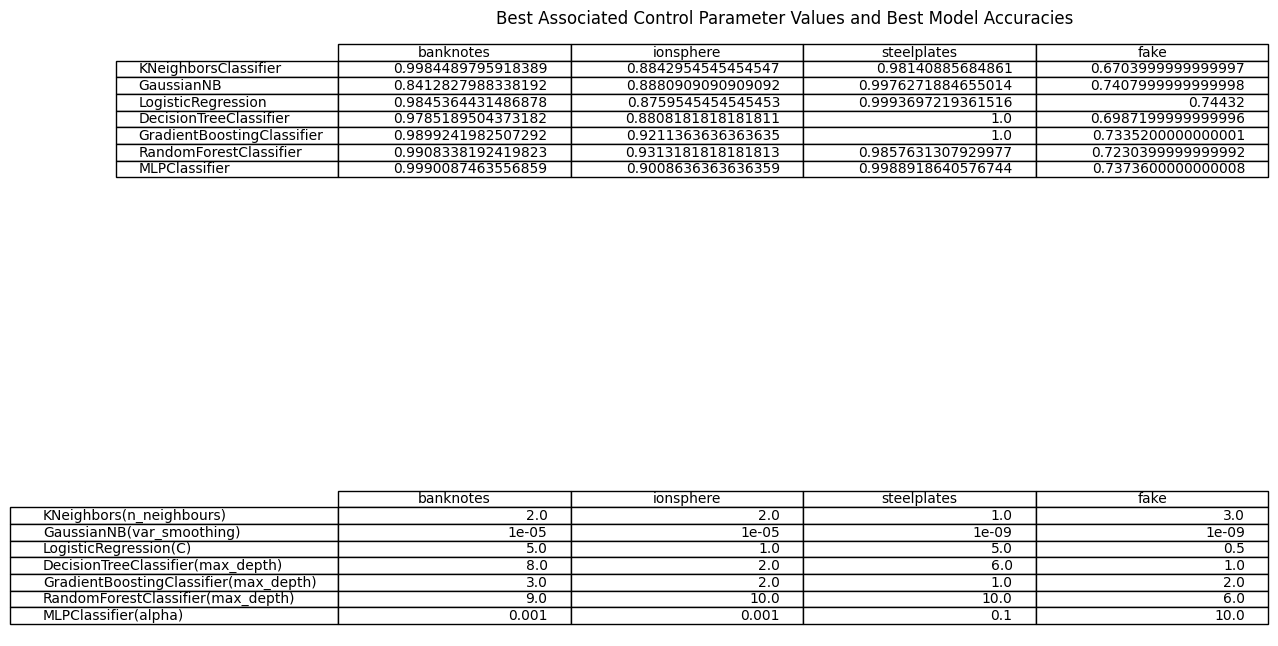

In [14]:
tabRow = ["KNeighborsClassifier", "GaussianNB", "LogisticRegression", "DecisionTreeClassifier", "GradientBoostingClassifier", "RandomForestClassifier", "MLPClassifier"]
tabCol = ["banknotes", "ionsphere", "steelplates", "fake"]
val3 = [["" for c in range(4)] for r in range(7)]

fig, ax = plt.subplots()
ax.set_axis_off()
ax.set_title("Best Associated Control Parameter Values and Best Model Accuracies")
table = ax.table(cellText = BestAssoTable, rowLabels = tabRow, colLabels = tabCol, loc = 'upper left')

tab2Row = tabRow = ["KNeighbors(n_neighbours)", "GaussianNB(var_smoothing)", "LogisticRegression(C)", "DecisionTreeClassifier(max_depth)", "GradientBoostingClassifier(max_depth)", "RandomForestClassifier(max_depth)", "MLPClassifier(alpha)"]
table2 = ax.table(cellText = BestModelTable, rowLabels = tab2Row, colLabels = tabCol, loc = 'lower left')
